In [1]:
import numpy  as np
import matplotlib.pyplot as plt
from scipy import signal

### Создание исходных сигналов

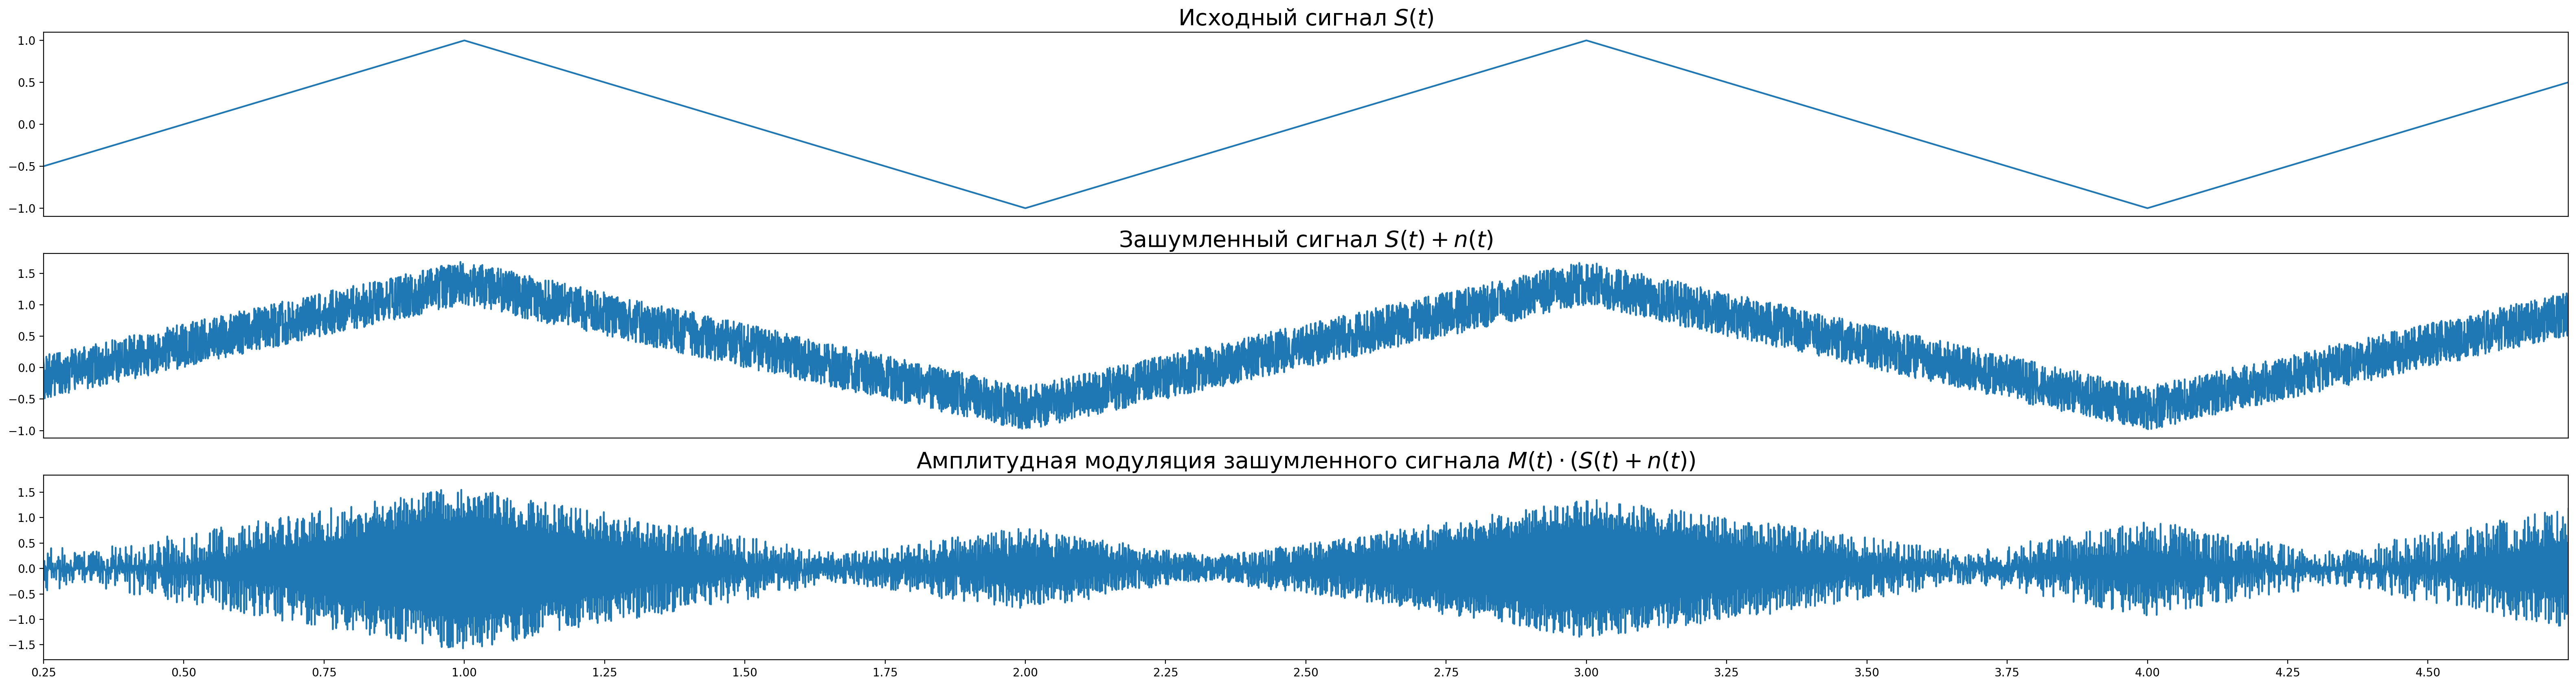

In [12]:
time = np.linspace(0, 5, 10000)
f_signal, f_modulator = 0.5, 500
noise = np.random.random(time.shape)
sig = signal.sawtooth(2 * np.pi * f_signal * time, 0.5)
modulator = np.sin(2 * np.pi * f_modulator * time) 
noised_sig = sig + noise * 0.7
moudlated_noised_signal = modulator * noised_sig
signals = [sig, noised_sig, moudlated_noised_signal]
names = ["Исходный сигнал $S(t)$", "Зашумленный сигнал $S(t) + n(t)$", r"Амплитудная модуляция зашумленного сигнала $M(t) \cdot (S(t) + n(t))$"]
fig, ax = plt.subplots(3, 1, figsize = (40, 10), dpi = 200)
for s, a, name in zip(signals, ax, names):
    a.plot(time, s)
    a.set_title(name, fontsize = 20)
    a.set_xlim(0.25, 4.75)
    a.set_xticks([])
ax[-1].set_xticks(np.arange(0.25, 4.75, 0.25));

### Фильтрация и демодуляция

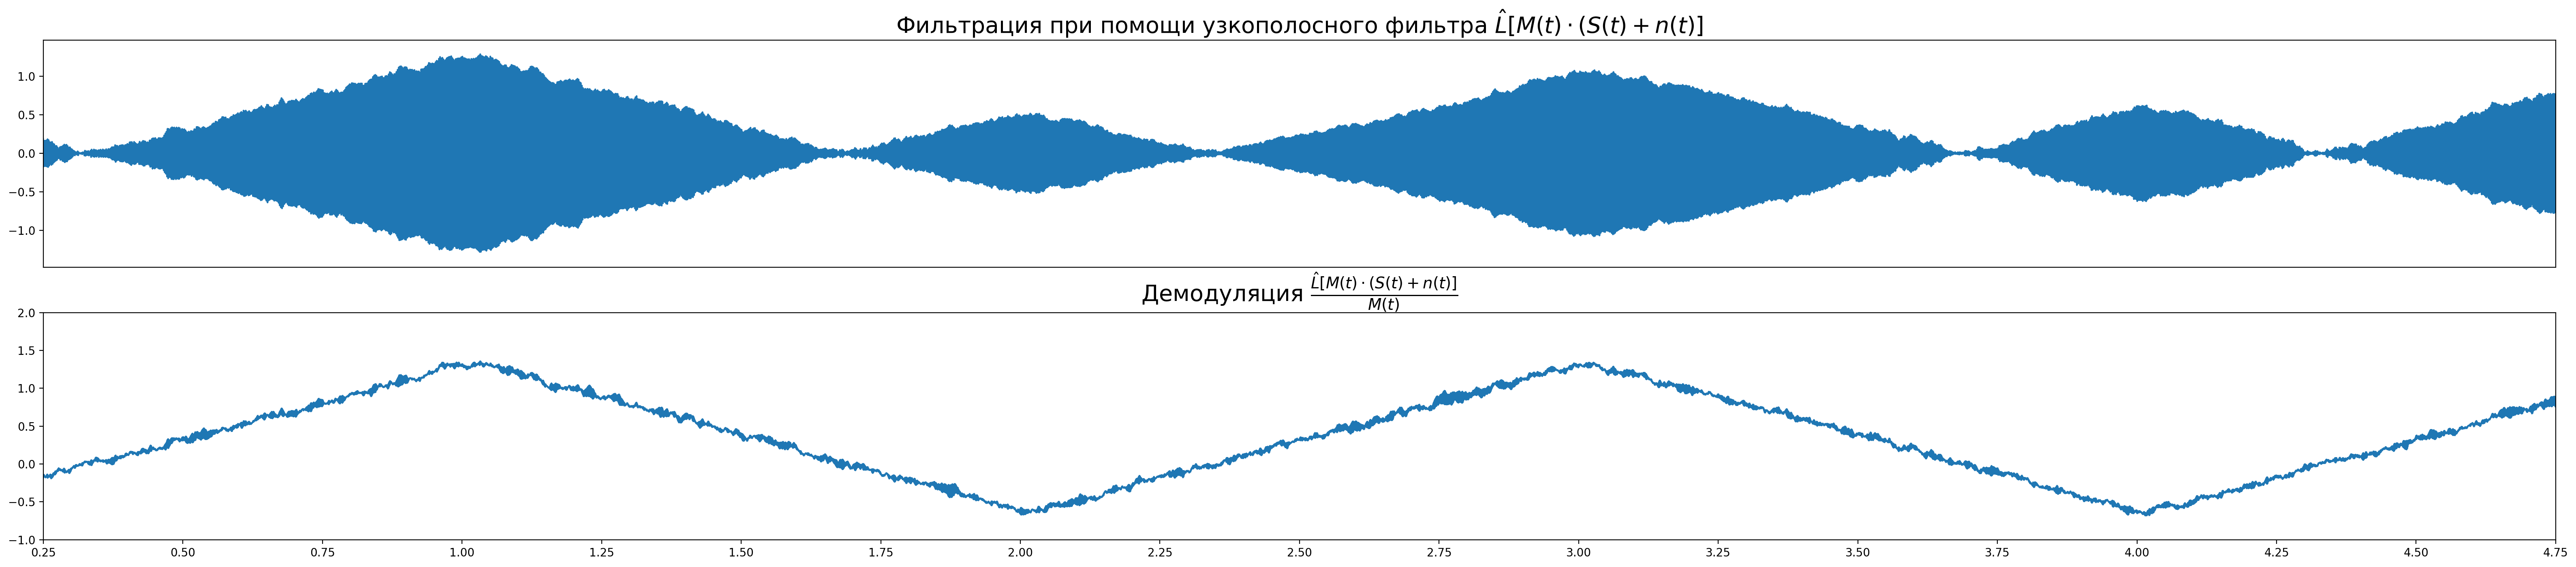

In [13]:
butter = signal.butter(1,
                        [f_modulator - 10, f_modulator + 10],
                          fs =  len(time) / np.max(time), 
                          btype = 'band',
                          output = 'sos')
filtered = signal.sosfilt(butter, moudlated_noised_signal)

demodulated = filtered / (modulator + 1e-6)
demodulated[np.abs(demodulated) > 10] = 0
signals = [filtered, demodulated]
names = [r"Фильтрация при помощи узкополосного фильтра $\hat{L}[M(t) \cdot (S(t) + n(t)]$",
         r"Демодуляция $\frac{\hat{L}[M(t) \cdot (S(t) + n(t)]}{M(t)}$"]
fig, ax = plt.subplots(2, 1, figsize = (40, 8), dpi = 200)
for s, a, name in zip(signals, ax, names):
    a.plot(time, s)
    a.set_title(name, fontsize = 20)
    a.set_xlim(0.25, 4.75)
    a.set_xticks([])
ax[-1].set_xticks(np.arange(0.25, 5, 0.25))
ax[1].set_ylim(-1, 2);

### Нахождение соотношений сигнал - шум

In [14]:
mask = time < 4.75
mask *= (time > 0.25)

input_noise = np.abs(noised_sig[mask] - sig[mask])
output = demodulated[mask] - np.mean(demodulated[mask])
output_noise = np.abs(output - sig[mask])

input_dynamic_range = 20 * np.log10(np.max(sig[mask]) / np.max(input_noise))
output_dynamic_range = 20 * np.log10(np.max(output) / np.max(output_noise))

In [15]:
print(f"Динамический диапазон входного сигнала {input_dynamic_range:.2f} Дб")
print(f"Динамический диапазон выходного сигнала {output_dynamic_range:.2f} Дб")

Динамический диапазон входного сигнала 3.10 Дб
Динамический диапазон выходного сигнала 16.24 Дб
